In [1]:
# Import libraries.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import warnings

# TF libraries.
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img


warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

2023-10-22 09:19:00.872566: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-10-22 09:19:00.874134: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-22 09:19:00.896778: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-22 09:19:00.896807: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-22 09:19:00.896820: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to regi

1. Data extraction and preparation.

1.1 Check data.  
The ./close directory contains 346 .jpg images (400x256), with name format 'closedEye{i}.jpg'  where i is a number 0-345.  
The ./open/test directory contains 81 .jpg images (400x256), with name format 'openEye{i}.jpg' where i is a number 0-80.  
The ./open/train directory contains 480 .jpg images (400x256), with name format 'openEye{i}.jpg' where i is a number 0-479.  


(260, 400)


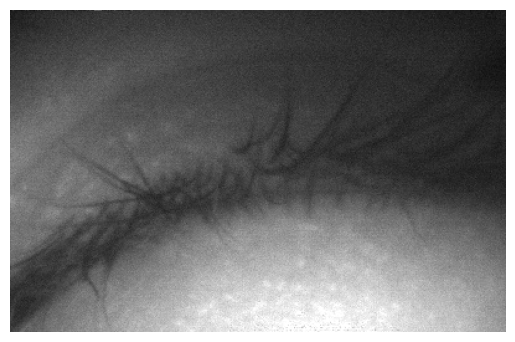

In [2]:
close_path = os.path.join('.','close','closedEye10.jpg')

img = plt.imread(close_path)
img = img/255
print(img.shape)

plt.axis('off')
plt.imshow(img, cmap='gray')

(260, 400)


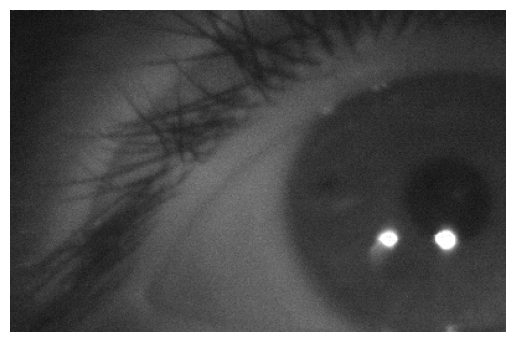

In [3]:
open_path = os.path.join('.','open/train','openedEye10.jpg')

img = plt.imread(open_path)
img = img/255
print(img.shape)

plt.axis('off')
plt.imshow(img, cmap='gray')

In [4]:
img.shape

(260, 400)

1.2 Create train and test datasets.

Need to create the train and the test sets. # We will import all images in the open_train_path and the open_test_path, transform them to tensors and concatenate as necessary. We will also create a flipped version to augment the data. To do this, we will also need to import the  csv files and modify the xcenter column.

In [5]:
# Get the 3 paths.
closed_path = os.path.join('.','close')
open_train_path = os.path.join('.', 'open','train')
open_test_path = os.path.join('.', 'open','test')


In [6]:
img_shape = img.shape
print('Images have a shape of (rows {y}, columns {x}) ', img_shape)

Images have a shape of (rows {y}, columns {x})  (260, 400)


In [7]:
# Get number of all .jpg files in each directory.
open_train_jpg_files = glob.glob(os.path.join(open_train_path, '*.jpg'))
num_open_train_jpg_files = len(open_train_jpg_files)

open_test_jpg_files = glob.glob(os.path.join(open_test_path, '*.jpg'))
num_open_test_jpg_files = len(open_test_jpg_files)

closed_jpg_files = glob.glob(os.path.join(closed_path, '*.jpg'))
num_closed_jpg_files = len(closed_jpg_files)

In [8]:
file =  os.path.join(open_train_path,'openedEye' + str(200) +'.jpg')
img = load_img(file, grayscale=True)
img = img_to_array(img)
img = np.squeeze(img)

flipped_img = np.fliplr(img)

#img = np.squeeze(img)
#flipped_img = np.squeeze(flipped_img)


Treat open_train .jpg files.

In [9]:
# Create the X1 array for the open train images and X1_rev for the images in reverse.
X1 = np.zeros((num_open_train_jpg_files, np.prod(img_shape[:])))
X1_rev = np.zeros((num_open_train_jpg_files, np.prod(img_shape[:])))

for i in (range(X1.shape[0])):
    file =  os.path.join(open_train_path,'openedEye' + str(i) +'.jpg')
    # print(file)
    # Import image.
    img = load_img(file, grayscale=True)

    # Turn to array and remove dimensions where dim = 1.
    img = img_to_array(img)
    img = np.squeeze(img)

    # Flip image.
    img_rev = np.fliplr(img)

    # Reshape 2D into 1D and scale by 255.
    x = img.reshape(np.prod(img.shape)) / 255
    x_rev = img_rev.reshape(np.prod(img_rev.shape)) /255
    
    # Store into X array where each row is an image and each col a pixel
    X1[i] = x
    X1_rev[i] = x_rev

    
# Create the y array for the open train images
y1 = np.ones((X1.shape[0], ))
y1_rev = np.ones((X1_rev.shape[0]))

Treat open_test .jpg files

In [10]:
# Create the X2 array for the open test images and X2_rev for the images in reverse.
X2 = np.zeros((num_open_test_jpg_files, np.prod(img_shape[:])))
X2_rev = np.zeros((num_open_test_jpg_files, np.prod(img_shape[:])))

for i in (range(X2.shape[0])):
    file =  os.path.join(open_test_path,'openEye' + str(i) +'.jpg')
    # print(file)
    # Import image.
    img = load_img(file, grayscale=True)

    # Turn to array and remove dimensions where dim = 1.
    img = img_to_array(img)
    img = np.squeeze(img)

    # Flip image.
    img_rev = np.fliplr(img)

    # Reshape 2D into 1D and scale by 255.
    x = img.reshape(np.prod(img.shape)) / 255
    x_rev = img_rev.reshape(np.prod(img_rev.shape)) /255
    
    # Store into X array where each row is an image and each col a pixel
    X2[i] = x
    X2_rev[i] = x_rev

    
# Create the y array for the open train images
y2 = np.ones((X2.shape[0], ))
y2_rev = np.ones((X2_rev.shape[0]))

In [11]:
y2.shape

(81,)

Treat closed .jpg files.

In [12]:
# Create the X2 array for the open test images and X2_rev for the images in reverse.
X3 = np.zeros((num_closed_jpg_files, np.prod(img_shape[:])))
X3_rev = np.zeros((num_closed_jpg_files, np.prod(img_shape[:])))

for i in (range(X3.shape[0])):
    file =  os.path.join(closed_path,'closedEye' + str(i) +'.jpg')
    # print(file)
    # Import image.
    img = load_img(file, grayscale=True)

    # Turn to array and remove dimensions where dim = 1.
    img = img_to_array(img)
    img = np.squeeze(img)

    # Flip image.
    img_rev = np.fliplr(img)

    # Reshape 2D into 1D and scale by 255.
    x = img.reshape(np.prod(img.shape)) / 255
    x_rev = img_rev.reshape(np.prod(img_rev.shape)) /255
    
    # Store into X array where each row is an image and each col a pixel
    X3[i] = x
    X3_rev[i] = x_rev

    
# Create the y array for the open train images
y3 = np.zeros((X3.shape[0], ))
y3_rev = np.zeros((X3_rev.shape[0]))

Verify flipping is conducted successfully.

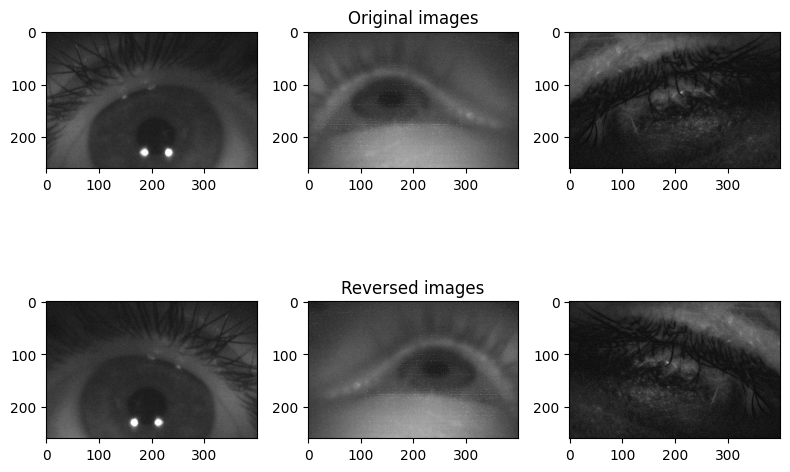

In [13]:
# Check images to ensure operation is successfull.
idx = 70
img1 = X1[idx].reshape(img_shape[0], img_shape[1])
img1_rev = X1_rev[idx].reshape(img_shape[0], img_shape[1])

img2 = X2[idx].reshape(img_shape[0], img_shape[1])
img2_rev = X2_rev[idx].reshape(img_shape[0], img_shape[1])

img3 = X3[idx].reshape(img_shape[0], img_shape[1])
img3_rev = X3_rev[idx].reshape(img_shape[0], img_shape[1])

plt.figure(figsize=(8,6))
plt.subplot(2,3,1)
plt.imshow(img1, cmap = 'gray')

plt.subplot(2,3,2)
plt.imshow(img2, cmap = 'gray')
plt.title('Original images')

plt.subplot(2,3,3)
plt.imshow(img3, cmap = 'gray')

plt.subplot(2,3,4)
plt.imshow(img1_rev, cmap = 'gray')

plt.subplot(2,3,5)
plt.imshow(img2_rev, cmap = 'gray')
plt.title('Reversed images')

plt.subplot(2,3,6)
plt.imshow(img3_rev, cmap = 'gray')

plt.tight_layout()

If the datasets are too large, we can use ImageDataGenerator class in tensorflow. However, the data need to be correctly placed into preset paths.

In [14]:
# # This can be used if the data is large enough 
# import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# 
# # Define parameters for loading the images
# batch_size = 32
# image_size = (224, 224)  # Adjust the image size as needed
# 
# # Define data directories
# data_dir1 = './src/close/'
# data_dir2_train = './src/open/train/'
# data_dir3_test = './src/open/test'
# 
# # Create image data generators for each directory
# datagen1 = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values
# datagen2 = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values
# datagen3 = ImageDataGenerator(rescale=1.0/255)  # Rescale pixel values
# 
# # Create TensorFlow datasets from each directory
# dataset1 = tf.keras.utils.image_dataset_from_directory(
#     data_dir1,
#     image_size=image_size,
#     batch_size=batch_size,
#     validation_split=0.2,  # Optional, for train/validation split
#     subset='training',       # Optional, for train/validation split
#     seed=1337
# )
# 
# dataset2_train = tf.keras.utils.image_dataset_from_directory(
#     data_dir2_train,
#     image_size=image_size,
#     batch_size=batch_size,
#     validation_split=0.2,  # Optional, for train/validation split
#     subset='training',       # Optional, for train/validation split
#     seed=1337
# )
# 
# dataset2_test = tf.keras.utils.image_dataset_from_directory(
#     data_dir2_train,
#     image_size=image_size,
#     batch_size=batch_size,
#     validation_split=0.2,  # Optional, for train/validation split
#     subset='validation',     # Optional, for train/validation split
#     seed=1337
# )
# 
# dataset3 = tf.keras.utils.image_dataset_from_directory(
#     data_dir3_test,
#     image_size=image_size,
#     batch_size=batch_size,
#     seed=1337
# )
# 
# # Combine the datasets into a single dataset
# combined_dataset = dataset1.concatenate(dataset2_train).concatenate(dataset2_test).concatenate(dataset3)
# 
# # You can also use `.shuffle()` and `.prefetch()` for better data loading
# combined_dataset = combined_dataset.shuffle(buffer_size=1000).prefetch(buffer_size=tf.data.AUTOTUNE)
# 

2. Open or closed classification.

Create train and test sets. In this occasion, we will use only the train_open and closed sets to ensure the datasets are not skewed. We will add the reversed sets if results are not good.

In [15]:
# We will use only the open_train and the closed data to maintain similarity between datasets.
X = np.concatenate([X1, X3])
y = np.concatenate([y1, y3])

In [16]:
# Split into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=12)

2.1 Define simple NN model - happy_model.

In [17]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers

def happy_model(input_dim, nb_hid_layers = 5, nb_units = 100, regul = 0, bnorm = False, dropout = 0):
    model = Sequential()

    # Add the first Dense layers of nb_units units with the input dimension
    model.add(Dense(nb_units, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Iterate wrt nb_hid_layers to create similar hidden layers.
    for i in range(nb_hid_layers):
        model.add(Dense(nb_units, activation = 'relu', kernel_regularizer = regularizers.l2(regul)))

        # Add batch normalization.
        if bnorm == True:
            model.add(BatchNormalization())
        
        # Add dropout regularization.
        if dropout > 0:
            model.add(Dropout(dropout))
    
    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(regul)))

    return model


2.2 Compile and run simple NN model, happy_model.

In [18]:
# Compile.
model1 = happy_model(input_dim = X.shape[1], nb_hid_layers=5, nb_units=200, bnorm = False, dropout = 0)
model1.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

2023-10-22 09:19:18.233802: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-10-22 09:19:18.234070: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2211] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [19]:
# Fit.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

callbacks = [EarlyStopping(monitor='val_loss', patience=20)] # TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]
history = model1.fit(X_train, y_train, epochs=200, batch_size = 64, validation_data=(X_test, y_test), callbacks = callbacks)

Epoch 1/200
11/11 [==============================] - 2s 135ms/step - loss: 2.5110 - accuracy: 0.5318 - val_loss: 1.6899 - val_accuracy: 0.4096
Epoch 2/200
11/11 [==============================] - 1s 96ms/step - loss: 1.3571 - accuracy: 0.4545 - val_loss: 0.6526 - val_accuracy: 0.7892
Epoch 3/200
11/11 [==============================] - 1s 94ms/step - loss: 1.1060 - accuracy: 0.5197 - val_loss: 0.6967 - val_accuracy: 0.4217
Epoch 4/200
11/11 [==============================] - 1s 95ms/step - loss: 0.6571 - accuracy: 0.6348 - val_loss: 0.6522 - val_accuracy: 0.5843
Epoch 5/200
11/11 [==============================] - 1s 96ms/step - loss: 0.5976 - accuracy: 0.7152 - val_loss: 0.6720 - val_accuracy: 0.6265
Epoch 6/200
11/11 [==============================] - 1s 96ms/step - loss: 0.5688 - accuracy: 0.7258 - val_loss: 0.5004 - val_accuracy: 0.7530
Epoch 7/200
11/11 [==============================] - 1s 99ms/step - loss: 0.4397 - accuracy: 0.8182 - val_loss: 0.6367 - val_accuracy: 0.6988
Epoch

In [20]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

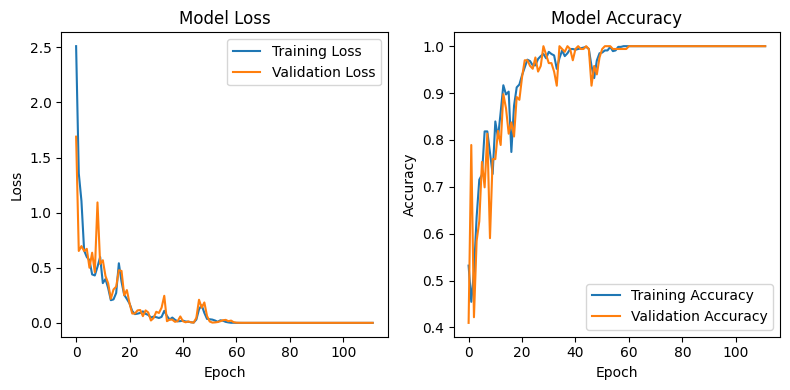

In [21]:
# Plot loss to confirm good hyperparameters.
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()

In [22]:
model1.evaluate(X_train, y_train, verbose = 0)

[1.0773924259410705e-06, 1.0]

In [23]:
model1.evaluate(X_test, y_test, verbose = 0)

[0.0004884139052592218, 1.0]

Very good result, 100% training accuracy, 100% test accuracy. It is noteworthy that to obtain these results no batch normalization or regularization (even dropout) were necessary.

In [24]:
# ! tensorboard --logdir=Graph

In [25]:
# Save model.
# model1.save('eye_classification_model.h5')

# Load model.
# model1 = tf.keras.models.load_model('eye_classification_model.h5')


3. Eye core location.  

3.1 Data preparation.  
The image data have already been transformed in section 1. For that reason, we only need to import the .csv data from the relevant directories containing bounding boxes.

In [26]:
df_train_path = glob.glob(os.path.join(open_train_path, '*.csv'))
df_test_path = glob.glob(os.path.join(open_test_path, '*.csv'))

In [27]:
df_train = pd.read_csv(df_train_path[0], delimiter=',', header=0)
df_test = pd.read_csv(df_test_path[0], delimiter=',', header=0)

In [28]:
df_train.head()

,id,xcentral,ycentral
0,0,220,90
1,1,235,102
2,2,221,138
3,3,307,84
4,4,295,80


In [29]:
df_train.describe(include = 'all')

,id,xcentral,ycentral
count,480.000000,480,480
unique,NaN,195,154
top,NaN,?,?
freq,NaN,49,49
mean,239.500000,NaN,NaN
std,138.708327,NaN,NaN
min,0.000000,NaN,NaN
25%,119.750000,NaN,NaN
50%,239.500000,NaN,NaN
75%,359.250000,NaN,NaN


In [30]:
df_train.shape

(480, 3)

In [31]:
df_test.head()

,id,xcentral,ycentral
0,0,187,158
1,1,182,185
2,2,181,136
3,3,158,124
4,4,105,142


In [32]:
df_test.describe(include = 'all')

,id,xcentral,ycentral
count,81.000000,81,81
unique,NaN,55,40
top,NaN,228,170
freq,NaN,4,6
mean,40.000000,NaN,NaN
std,23.526581,NaN,NaN
min,0.000000,NaN,NaN
25%,20.000000,NaN,NaN
50%,40.000000,NaN,NaN
75%,60.000000,NaN,NaN


There are missing values in the dataframe columns xcentral and ycentral, disguised as '?' strings. Assuming that the id column is the same as the index, we will drop the id column and the rows with '?' values. These rows will need to be removed from the X1, X1_rev, X2, X2_rev matrix too.

In [33]:
# Drop rows with '?' values from X1, X1_rev
X1 = X1[df_train['xcentral'] != '?']
X1_rev = X1_rev[df_train['xcentral'] != '?']


In [34]:
# Drop rows with '?' values from df_train.
df_train = df_train[df_train['xcentral'] != '?'].copy()
df_train = df_train[df_train['ycentral'] != '?'].copy()

In [35]:
# Drop rows with '?' values from X2, X2_rev
X2 = X2[df_test['xcentral'] != '?']
X2_rev = X2_rev[df_test['xcentral'] != '?']



In [36]:
# Drop rows with '?' values from df_test.
df_test = df_test[df_test['xcentral'] != '?'].copy()
df_test = df_test[df_test['ycentral'] != '?'].copy()

In [37]:
# Transform df_train and df_test columns to float.
df_train = df_train.astype('float')
df_train = df_train.drop(columns = ['id'])
df_train = df_train.reset_index(drop=True)

df_test = df_test.astype('float')
df_test = df_test.drop(columns=['id'])
df_test = df_test.reset_index(drop=True)

In [38]:
df_train.head()

,xcentral,ycentral
0,220.0,90.0
1,235.0,102.0
2,221.0,138.0
3,307.0,84.0
4,295.0,80.0


Create 2 dataframes with coordinates flipped along the x-axis (image columns).

In [39]:
df_train_rev = df_train.copy()
df_train_rev['xcentral'] = img_shape[1] - df_train_rev['xcentral']

df_test_rev = df_test.copy()
df_test_rev['xcentral'] = img_shape[1] - df_test_rev['xcentral']

Visualize eyes and their centers.

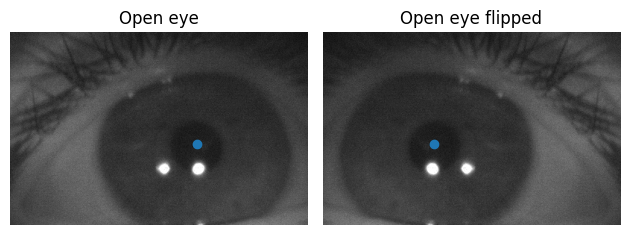

In [41]:
idx = 354
img1 = X1[idx].reshape(img_shape[0], img_shape[1])
img1_rev = X1_rev[idx].reshape(img_shape[0], img_shape[1])

plt.subplot(1,2,1)
plt.imshow(img1, cmap = 'gray')
plt.scatter(df_train.loc[idx, 'xcentral'], df_train.loc[idx, 'ycentral'])
plt.axis('off')
plt.title('Open eye')

plt.subplot(1,2,2)
plt.imshow(img1_rev, cmap = 'gray')
plt.scatter(df_train_rev.loc[idx, 'xcentral'], df_train_rev.loc[idx, 'ycentral'])
plt.title('Open eye flipped')
plt.axis('off')

plt.tight_layout()

Create final datasets. 

In [42]:
# Use both open eye sets and their flipped images and eye centers.
X = np.concatenate([X1, X1_rev, X2, X2_rev])

y = np.concatenate([np.array(df_train), 
                         np.array(df_train_rev),
                         np.array(df_test),
                         np.array(df_test_rev)])


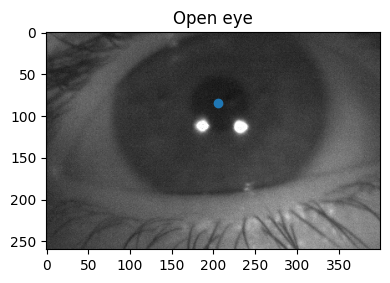

In [43]:
idx = 227
img = X[idx].reshape(img_shape[0], img_shape[1])
plt.figure(figsize = (4,3))
plt.imshow(img, cmap = 'gray')
plt.scatter(y[idx, 0], y[idx,1])
plt.axis('on')
plt.title('Open eye')
plt.tight_layout()

In [58]:
df_test.shape

(80, 2)

In [56]:
y.shape

(1022, 2)

In [57]:
y[862: 872, :]

array([[187., 158.],
       [182., 185.],
       [181., 136.],
       [158., 124.],
       [105., 142.],
       [101., 145.],
       [187., 149.],
       [251., 181.],
       [260., 182.],
       [228., 164.]])

In [59]:
y[942:952, :]

array([[213., 158.],
       [218., 185.],
       [219., 136.],
       [242., 124.],
       [295., 142.],
       [299., 145.],
       [213., 149.],
       [149., 181.],
       [140., 182.],
       [172., 164.]])

Scale y values to fall in the range [0, 1].

In [60]:
img_shape

(260, 400)

In [61]:
y_scaled = y / [img_shape[1], img_shape[0]]

In [62]:
# Split into train and test set.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_scaled, test_size = 0.2, random_state=12)

2.2 Define simple NN model - happy_model_linear.  
We will use similar simple architecture as above.

In [63]:
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras import Sequential
from tensorflow.keras import regularizers

def happy_model_regr(input_dim, nb_hid_layers = 5, nb_units = 100, regul = 0, bnorm = False, dropout = 0):
    model = Sequential()

    # Add the first Dense layers of 300 units with the input dimension
    model.add(Dense(nb_units, input_dim=input_dim, activation='relu', kernel_regularizer=regularizers.l2(regul)))

    # Iterate wrt nb_hid_layers to create similar hidden layers.
    for i in range(nb_hid_layers):
        model.add(Dense(nb_units, activation = 'relu', kernel_regularizer = regularizers.l2(regul)))

        # Add batch normalization.
        if bnorm == True:
            model.add(BatchNormalization())
        
        # Add dropout regularization.
        if dropout > 0:
            model.add(Dropout(dropout))
    
    # Add finally the output layer with one unit: the predicted result
    model.add(Dense(2, activation='linear', kernel_regularizer=regularizers.l2(regul)))

    return model

2.3 Compile and run simple NN model, happy_model_reg.


In [64]:
# Compile.
model_regr = happy_model_regr(input_dim = X_train.shape[1], nb_hid_layers=10, nb_units=100, bnorm=False, dropout=0, regul = 0.0)
model_regr.compile(optimizer='adam', loss = 'mean_squared_error', metrics=['mean_squared_error'])

In [65]:
# Fit.
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard

callbacks = [EarlyStopping(monitor='val_loss', patience=20)] # TensorBoard(log_dir='./Graph', histogram_freq=0, write_graph=True, write_images=True)]

history = model_regr.fit(x=X_train, y=y_train, validation_data=(X_test, y_test), epochs=200, batch_size=64, callbacks=callbacks)

Epoch 1/200
13/13 [==============================] - 2s 69ms/step - loss: 0.1790 - mean_squared_error: 0.1790 - val_loss: 0.0673 - val_mean_squared_error: 0.0673
Epoch 2/200
13/13 [==============================] - 1s 52ms/step - loss: 0.0886 - mean_squared_error: 0.0886 - val_loss: 0.0566 - val_mean_squared_error: 0.0566
Epoch 3/200
13/13 [==============================] - 1s 52ms/step - loss: 0.0611 - mean_squared_error: 0.0611 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 4/200
13/13 [==============================] - 1s 52ms/step - loss: 0.0455 - mean_squared_error: 0.0455 - val_loss: 0.0483 - val_mean_squared_error: 0.0483
Epoch 5/200
13/13 [==============================] - 1s 53ms/step - loss: 0.0486 - mean_squared_error: 0.0486 - val_loss: 0.0406 - val_mean_squared_error: 0.0406
Epoch 6/200
13/13 [==============================] - 1s 50ms/step - loss: 0.0415 - mean_squared_error: 0.0415 - val_loss: 0.0377 - val_mean_squared_error: 0.0377
Epoch 7/200
13/13 [=========

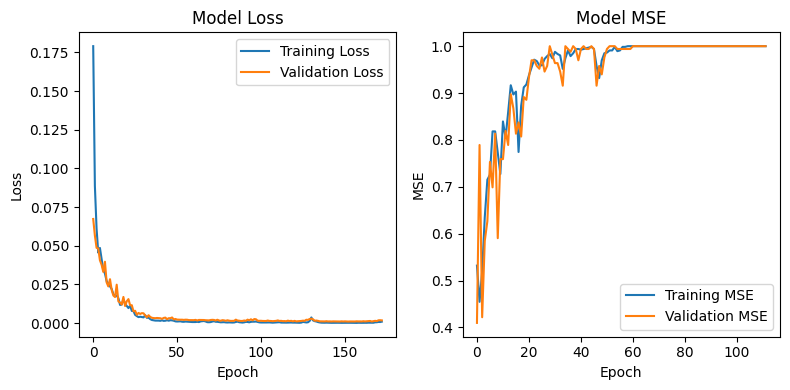

In [66]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']

train_error = history.history['mean_squared_error']
val_error = history.history['val_mean_squared_error']


# Plot loss to confirm good hyperparameters.
plt.figure(figsize=(8,4))

plt.subplot(1,2,1)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1,2,2)
plt.plot(train_accuracy, label='Training MSE')
plt.plot(val_accuracy, label='Validation MSE')
plt.title('Model MSE')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend()

plt.tight_layout()

In [68]:
# Save model.
# model_regr.save('eye_regression_model.h5')

# Load model.
# model_regr = tf.keras.models.load_model('eye_regression_model.h5')

Visualize some results on the test set.

In [73]:
y_pred = model_regr.predict(X_test)

7/7 [==============================] - 1s 8ms/step


In [74]:
y_test_rescaled = y_test * [img_shape[1], img_shape[0]]
y_pred_rescaled = y_pred * [img_shape[1], img_shape[0]]

In [76]:
y_pred_rescaled.shape

(205, 2)

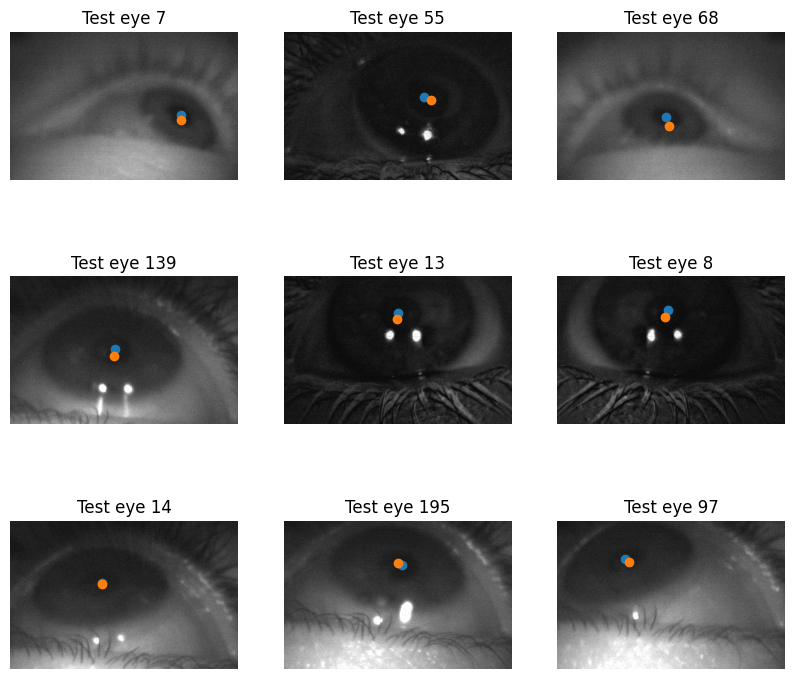

In [84]:
# Get several random test and visualize ground truth vs prediction.
import random
nb_eyes = 9
idx = random.sample(range(0, len(y_pred_rescaled)), nb_eyes)

n_cols = 3
n_rows = np.ceil(nb_eyes / n_cols).astype(int)


fig, axes = plt.subplots(ncols = n_cols, nrows = n_rows, figsize = (10, n_rows * 3)) 
axes = axes.flatten()

for i in range(nb_eyes):
    img = X_test[idx[i]].reshape(img_shape[0], img_shape[1])
    y_real = y_test_rescaled[idx[i]]
    y_predicted = y_pred_rescaled[idx[i]]
    
    axes[i].imshow(img, cmap = 'gray')
    axes[i].scatter(y_real[0], y_real[1], label = 'Real')
    axes[i].scatter(y_predicted[0], y_predicted[1], label = 'Predicted')
    axes[i].set_title(f'Test eye {idx[i]}')
    axes[i].axis('off')

# Remove unploted axes.
if nb_eyes < n_rows * n_cols:
    for i in range(nb_eyes, n_rows * n_cols):
        fig.delaxes(axes[i])

The results are not too bad, it might be possible to increase the regression accuracy using a larger dataset, or even augmenting the current dataset with a flip along the y-axis.